In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('tips.csv')

In [3]:
df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [4]:
df.tail()

,total_bill,tip,sex,smoker,day,time,size
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2
243,18.78,3.00,Female,No,Thur,Dinner,2


In [11]:
df.shape

(244, 7)

We have 244 datapoints and 7 Features

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


We have 3 Numerical Features and 4 Categorical Features

In [8]:
df.isnull().sum()

total_bill    0
tip           0
sex           0
smoker        0
day           0
time          0
size          0
dtype: int64

No null values present in the dataset

In [10]:
df.describe()

,total_bill,tip,size
count,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672
std,8.902412,1.383638,0.951100
min,3.070000,1.000000,1.000000
25%,13.347500,2.000000,2.000000
50%,17.795000,2.900000,2.000000
75%,24.127500,3.562500,3.000000
max,50.810000,10.000000,6.000000


# Objective

To predict the amount of tip given by the person

# Exploratory Data Analysis

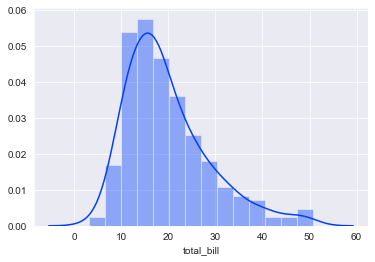

In [31]:
sns.set_style('darkgrid')
sns.set_palette('bright')
sns.distplot(df['total_bill'])

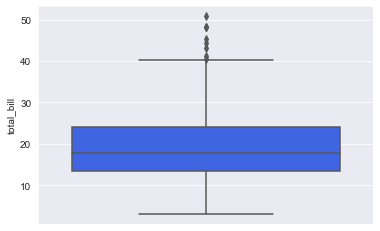

In [100]:
sns.boxplot(y='total_bill',data=df,color='#2457fd')

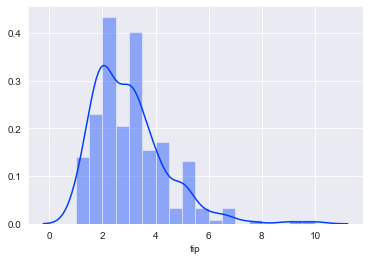

In [18]:
sns.distplot(df['tip'])

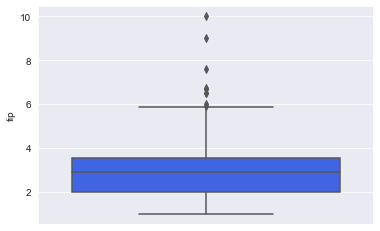

In [101]:
sns.boxplot(y='tip',data=df,color='#2457fd')

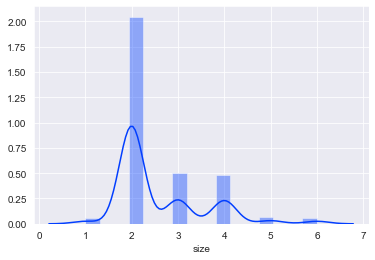

In [19]:
sns.distplot(df['size'])

Obeservations from above distribution plots

1. The total bill amount tend to be between 10-25 Dollars
2. The Tips tend to be between 1.5-3.5 Dollars
3. The Number of person per bill are mostly 2

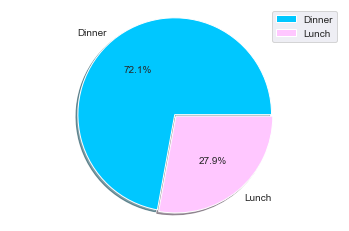

In [66]:
labels='Dinner','Lunch'
sizes=list(df['time'].value_counts())
colors=['#00c7ff','#ffc7ff']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,explode=explode)
plt.axis('equal')
plt.legend()
plt.show()

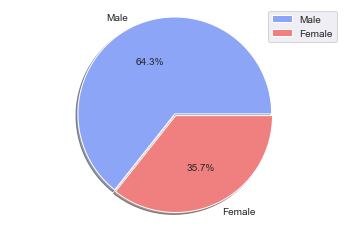

In [67]:
labels='Male','Female'
sizes=list(df['sex'].value_counts())
colors=['#8da5f7','lightcoral']
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,explode=explode)
plt.axis('equal')
plt.legend()
plt.show()

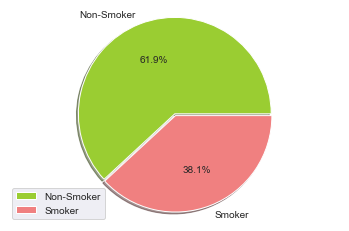

In [68]:
labels='Non-Smoker','Smoker'
sizes=list(df['smoker'].value_counts())
colors=['yellowgreen','lightcoral']
explode=[0,0.02]
plt.pie(sizes,labels=labels,colors=colors,autopct='%1.1f%%',shadow=True,explode=explode)
plt.axis('equal')
plt.legend()
plt.show()

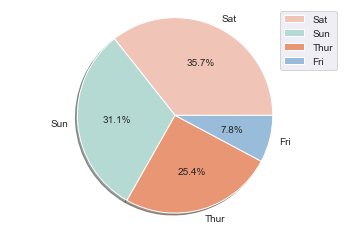

In [69]:
labels='Sat','Sun','Thur','Fri'
sizes=list(df['day'].value_counts())
color=['#f1c4b8','#b5dad3','#e99675','#98bcd9']
plt.pie(sizes,labels=labels,autopct='%1.1f%%',shadow=True,colors=color)
plt.axis('equal')
plt.legend()
plt.show()

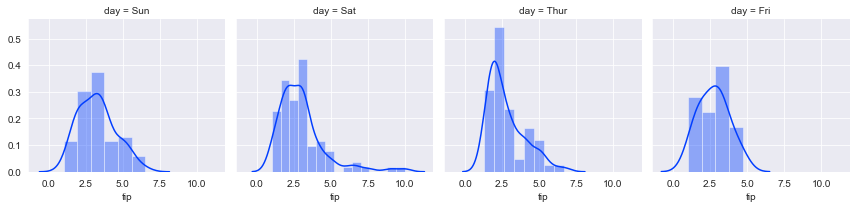

In [23]:
a=sns.FacetGrid(df,col='day')
a.map(sns.distplot,'tip')

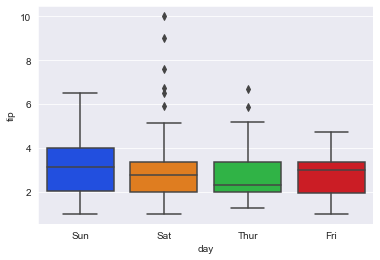

In [112]:
sns.set_palette('bright')
sns.boxplot(x='day',y='tip',data=df)

Observations

1. The Tips given on Thursday are between 2-3.3 Dollars
2. The Tips given on Friday are between 2-3.3 Dollars
3. The Tips given on Saturday are between 2.7-3.3 Dollars
4. The Tips given on Sunday are between 2-4 Dollars


In [21]:
df.groupby('day').tip.describe()

,count,mean,std,min,25%,50%,75%,max
day,,,,,,,,
Fri,19.0,2.734737,1.019577,1.00,1.9600,3.000,3.3650,4.73
Sat,87.0,2.993103,1.631014,1.00,2.0000,2.750,3.3700,10.00
Sun,76.0,3.255132,1.234880,1.01,2.0375,3.150,4.0000,6.50
Thur,62.0,2.771452,1.240223,1.25,2.0000,2.305,3.3625,6.70


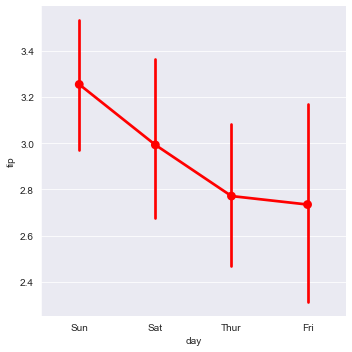

In [34]:
sns.catplot(x='day',y='tip',kind='point',data=df,estimator=np.mean,color='r')

Observation

1. Mean tip given on Thursday is 2.78 Dollars
2. Mean tip given on Friday is 2.77 Dollars
3. Mean tip given on Saturday is 2.9 Dollars
4. Mean tip given on Sunday is 3.25 Dollars

Conclusion

1. The distribution and mean suggests Tips does depends upon the Day and should be considered in the model

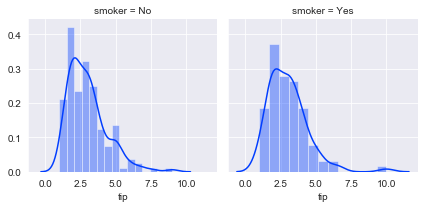

In [105]:
a=sns.FacetGrid(df,col='smoker')
a.map(sns.distplot,'tip')

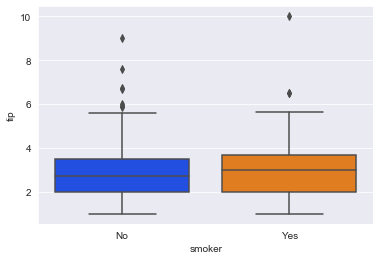

In [111]:
sns.boxplot(x='smoker',y='tip',data=df)

Observation

1. The Tips given by a smoker tends to be between 2-3.5 Dollars
2. The Tips given by a non-smoker tends to be between 2-3.5 Dollars

In [71]:
df.groupby('smoker').tip.describe()

,count,mean,std,min,25%,50%,75%,max
smoker,,,,,,,,
No,151.0,2.991854,1.377190,1.0,2.0,2.74,3.505,9.0
Yes,93.0,3.008710,1.401468,1.0,2.0,3.00,3.680,10.0


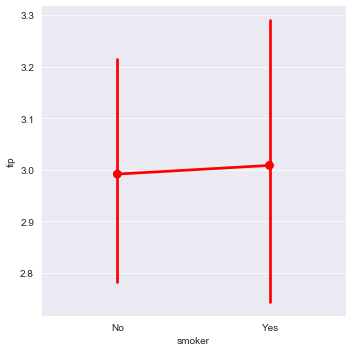

In [72]:
sns.catplot(x='smoker',y='tip',kind='point',data=df,estimator=np.mean,color='r')

Observation

1. The mean tip given by a smoker is 3 Dollars
2. The mean tip given by a non-smoker is 3 Dollars

Conclusion

1. The distribution of tips given by smoker and non-smoker is similar
2. The mean tips is almost same
3. This sugests the tips given may not depend upon weather the person smokes or not, so can be droped from the model

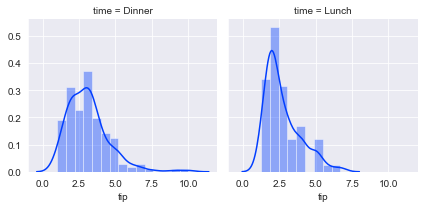

In [128]:
a=sns.FacetGrid(df,col='time')
a.map(sns.distplot,'tip')

Observations

1. The Tips given on Dinner tends to be between 2-3.5 Dollars
2. The Tips given on Lunch tends to be between 2-3.1 Dollars

In [74]:
df.groupby('time').tip.describe()

,count,mean,std,min,25%,50%,75%,max
time,,,,,,,,
Dinner,176.0,3.102670,1.436243,1.00,2.0,3.00,3.6875,10.0
Lunch,68.0,2.728088,1.205345,1.25,2.0,2.25,3.2875,6.7


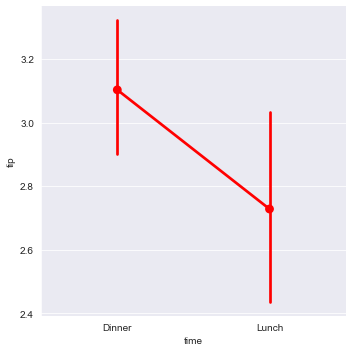

In [75]:
sns.catplot(x='time',y='tip',kind='point',data=df,estimator=np.mean,color='r')

Observation

1. The mean tip given on Dinner time is 3.1 Dollars
2. The mean tip given on Lunch time is 2.7 Dollars

Conclusions 

1. The distribution and mean suggests Tips does depends upon the time and should be considered in the model

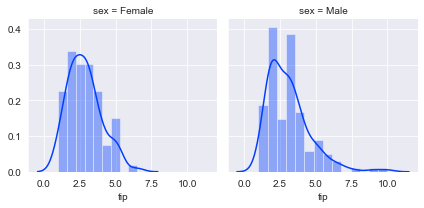

In [107]:
a=sns.FacetGrid(df,col='sex')
a.map(sns.distplot,'tip')

Observations

1. The tips given by female tend to be between 2-3.5
2. The tips given by female tend to be between 2-3.7

In [79]:
df.groupby('sex').tip.describe()

,count,mean,std,min,25%,50%,75%,max
sex,,,,,,,,
Female,87.0,2.833448,1.159495,1.0,2.0,2.75,3.50,6.5
Male,157.0,3.089618,1.489102,1.0,2.0,3.00,3.76,10.0


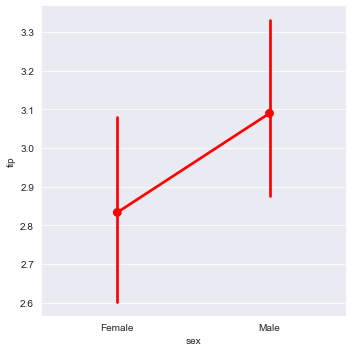

In [80]:
sns.catplot(x='sex',y='tip',kind='point',data=df,estimator=np.mean,color='r')

Observations

1. The mean tip given by a Male is 3.09 Dollars
2. The mean tip given by a Female is 2.82 Dollars

Conclusions 

1. The disrtibution and mean suggests Tips does depends upon the Sex and should be considered in the model

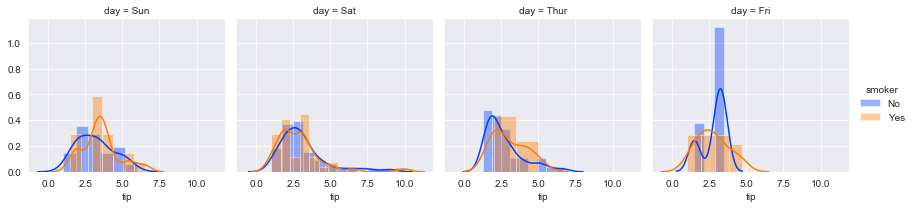

In [113]:
a=sns.FacetGrid(df,col='day',hue='smoker')
a.map(sns.distplot,'tip')
a.add_legend()

In [77]:
df.groupby(['day','smoker']).tip.describe()

count      mean       std   min    25%    50%     75%    max
day  smoker                                                              
Fri  No        4.0  2.812500  0.898494  1.50  2.625  3.125  3.3125   3.50
     Yes      15.0  2.714000  1.077668  1.00  1.960  2.500  3.2400   4.73
Sat  No       45.0  3.102889  1.642088  1.00  2.010  2.750  3.3900   9.00
     Yes      42.0  2.875476  1.630580  1.00  2.000  2.690  3.1975  10.00
Sun  No       57.0  3.167895  1.224785  1.01  2.000  3.020  3.9200   6.00
     Yes      19.0  3.516842  1.261151  1.50  3.000  3.500  4.0000   6.50
Thur No       45.0  2.673778  1.282964  1.25  1.800  2.180  3.0000   6.70
     Yes      17.0  3.030000  1.113491  2.00  2.000  2.560  4.0000   5.00

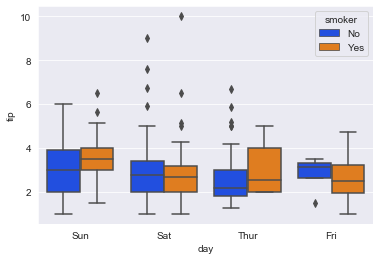

In [114]:
sns.boxplot(x='day', y='tip',hue='smoker',data=df )

Observations

1. The tip given by a Smoker on a Thursday is between 2-4.1 Dollars
2. The tip given by a Non-Smoker on a Thursday is between 1.8-3 Dollars
3. The tip given by a Smoker on a Friday is between 2-3.2 Dollars
4. The tip given by a Non-Smoker on a Friday is between 2.6-3.3 Dollars
5. The tip given by a Smoker on a Saturday is between 2-3.1 Dollars
6. The tip given by a Non-Smoker on a Saturday is between 2-3.3 Dollars
7. The tip given by a Smoker on a Sunday is between 3-4 Dollars
8. The tip given by a Non-Smoker on a Sunday is between 2-3.9 Dollars

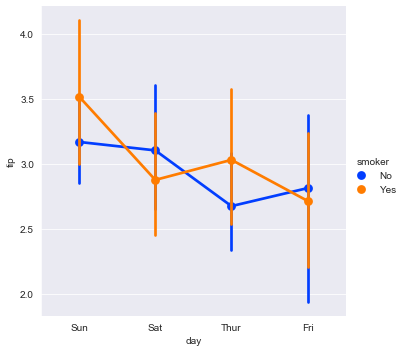

In [90]:
sns.set_style('darkgrid')
sns.catplot(x='day',y='tip',hue='smoker',kind='point',data=df,estimator=np.mean)

Observations

1. The mean tip given by a Smoker on Thursday is 3.02 Dollars and by a Non-smoker is 2.6 Dollars
2. The mean tip given by a Smoker on Friday is 2.7 Dollars and by a Non-smoker is 2.8 Dollars
3. The mean tip given by a Smoker on Saturday is 2.8 Dollars and by a Non-smoker is 3.1 Dollars
4. The mean tip given by a Smoker on Sunday is 3.5 Dollars and by a Non-smoker is 3.2 Dollars

Conclusion

1. The distribution and mean suggests that tip depends on the day the smoker comes on.

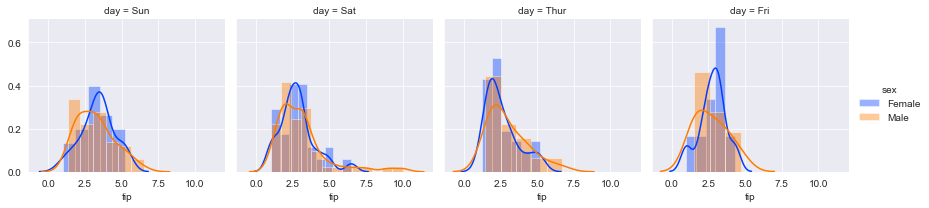

In [115]:
a=sns.FacetGrid(df,col='day',hue='sex')
a.map(sns.distplot,'tip')
a.add_legend()

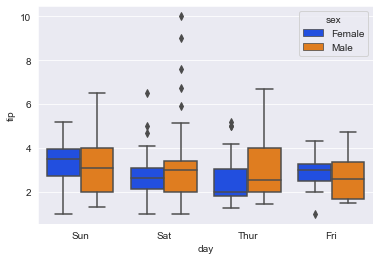

In [116]:
sns.boxplot(x='day', y='tip',hue='sex',data=df )

In [117]:
df.groupby(['day','sex']).tip.describe()

count      mean       std   min     25%    50%     75%    max
day  sex                                                                  
Fri  Female    9.0  2.781111  0.938862  1.00  2.5000  3.000  3.2500   4.30
     Male     10.0  2.693000  1.136428  1.50  1.6650  2.600  3.3750   4.73
Sat  Female   28.0  2.801786  1.234480  1.00  2.1500  2.625  3.1025   6.50
     Male     59.0  3.083898  1.791360  1.00  2.0000  3.000  3.4000  10.00
Sun  Female   18.0  3.367222  1.136775  1.01  2.7075  3.500  3.9375   5.20
     Male     58.0  3.220345  1.271172  1.32  2.0000  3.085  3.9800   6.50
Thur Female   32.0  2.575625  1.109286  1.25  1.8225  2.005  3.0575   5.17
     Male     30.0  2.980333  1.353734  1.44  2.0000  2.530  4.0000   6.70

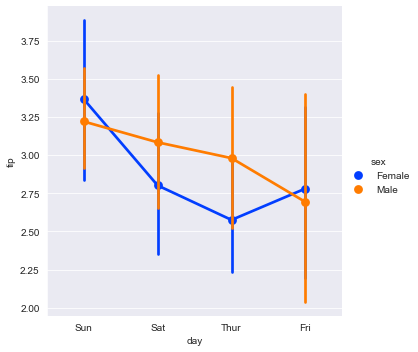

In [118]:
sns.catplot(x='day',y='tip',hue='sex',kind='point',data=df,estimator=np.mean)

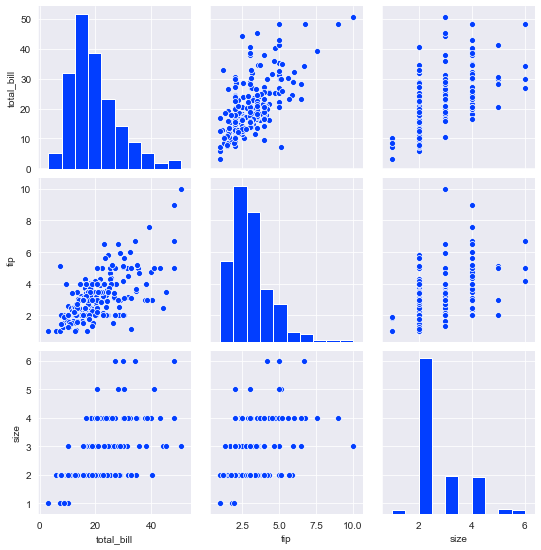

In [119]:
sns.pairplot(data=df)

Observations

1. Total Bill and Tip have a correlation, as the bill increase the tip also increases
2. Tip and size have no correlation

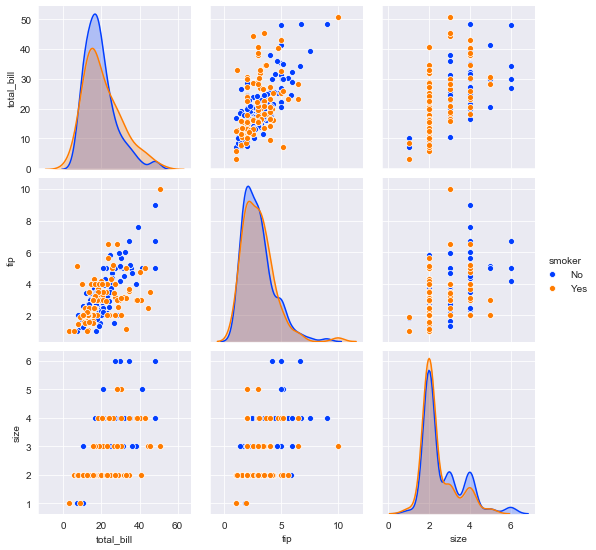

In [122]:
sns.pairplot(data=df,hue='smoker')

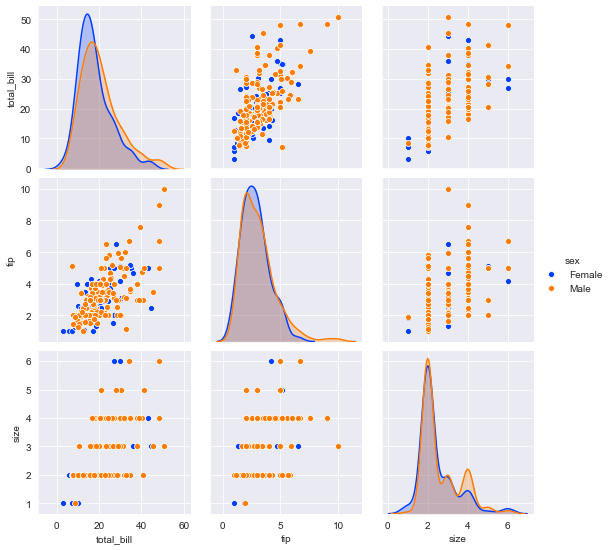

In [123]:
sns.pairplot(data=df,hue='sex')